<a href="https://colab.research.google.com/github/GuptaNavdeep1983/CS688/blob/main/767_assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np

In [3]:
iris = load_iris()

iris_columns = ['sepal_len', 'sepal_width', 'petal_length', 'petal_width', 'target']
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris_columns)

df.loc[df['target'] != 0,'target'] = 1

In [ ]:
from sklearn.model_selection import train_test_split
X = df[['sepal_len', 'sepal_width', 'petal_length', 'petal_width']]
y = df[['target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 10)
X_train

In [73]:
def predict(row, weights, bias):
  output = bias
  for index, weight in enumerate(weights):
    output += weight * row[index]
  return 1.0 if output > 0.0 else 0.0 

def train_weights_using_batch_gradient_descent(X_train, y_train, num_epochs, learning_rate):
  # weights for all the features 
  weights = [0,0,0,0]
  bias = 0
  index = 0
  df_plot = []
  while index < num_epochs:
    mse = 0.0
    total_gradient = weights
    for rowIndex, row in X_train.iterrows():
      predicted_value = predict(row, weights, bias)
      error = y_train.loc[rowIndex,'target'] - predicted_value
      mse += error**2
      total_gradient = [weight + (error * row[weight_index]) for weight_index, weight in enumerate(total_gradient)] 
    bias = bias + learning_rate * (mse/X_train.shape[0])
    weights = [weight + learning_rate * (total_gradient[weight_index]/X_train.shape[0]) for weight_index, weight in enumerate(weights)]
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (index, learning_rate, mse/X_train.shape[0]))
    df_plot.append({mse/X_train.shape[0], index, weights[1], weights[2]})
    index = index + 1
  df_plot = pd.DataFrame(df_plot, columns=['mse', 'epoch', 'sepal_width', 'petal_length'])
  return weights, bias, df_plot

(weights_using_batch_gradient_descent, bias_using_batch_gradient_descent, df_plot) = train_weights_using_batch_gradient_descent(X_train, y_train, 50, 0.1)

print(weights_using_batch_gradient_descent)

>epoch=0, lrate=0.100, error=0.667
>epoch=1, lrate=0.100, error=0.333
>epoch=2, lrate=0.100, error=0.333
>epoch=3, lrate=0.100, error=0.333
>epoch=4, lrate=0.100, error=0.000
>epoch=5, lrate=0.100, error=0.000
>epoch=6, lrate=0.100, error=0.000
>epoch=7, lrate=0.100, error=0.000
>epoch=8, lrate=0.100, error=0.000
>epoch=9, lrate=0.100, error=0.000
>epoch=10, lrate=0.100, error=0.000
>epoch=11, lrate=0.100, error=0.000
>epoch=12, lrate=0.100, error=0.000
>epoch=13, lrate=0.100, error=0.000
>epoch=14, lrate=0.100, error=0.000
>epoch=15, lrate=0.100, error=0.000
>epoch=16, lrate=0.100, error=0.000
>epoch=17, lrate=0.100, error=0.000
>epoch=18, lrate=0.100, error=0.000
>epoch=19, lrate=0.100, error=0.000
>epoch=20, lrate=0.100, error=0.000
>epoch=21, lrate=0.100, error=0.000
>epoch=22, lrate=0.100, error=0.000
>epoch=23, lrate=0.100, error=0.000
>epoch=24, lrate=0.100, error=0.000
>epoch=25, lrate=0.100, error=0.000
>epoch=26, lrate=0.100, error=0.000
>epoch=27, lrate=0.100, error=0.000
>e

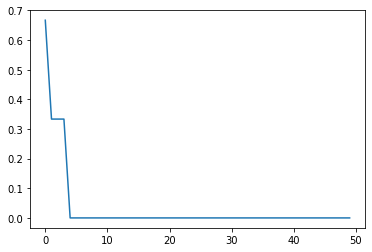

In [67]:
plt.plot(df_plot['epoch'], df_plot['mse'])

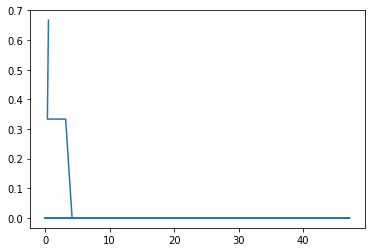

In [75]:
df_plot.sort_values(by=['2'], ascending=False)
plt.plot(df_plot['sepal_width'] + df_plot['petal_length'], df_plot['mse'])

In [68]:
def test_model(X_test, y_test, weights, bias):
  y_test['predicted'] = 0.0
  for rowIndex, row in X_test.iterrows():
    y_test.loc[rowIndex, 'predicted'] = predict(row, weights, bias)
  print(sum(y_test['predicted'] == y_test['target']))

test_model(X_test, y_test, weights_using_batch_gradient_descent, bias_using_batch_gradient_descent)

30


In [69]:
def train_weights_using_mini_batch_gradient_descent(X_train, y_train, batch_size, num_epochs, learning_rate):
  # weights for all the features 
  weights = [0,0,0,0]
  bias = 0
  index = 0;
  df_plot = []
  while index < num_epochs:
    mse = 0.0
    total_gradient = weights
    mini_batch = X_train.sample(n = batch_size, random_state=42)
    for rowIndex, row in mini_batch.iterrows():
      predicted_value = predict(row, weights, bias)
      error = y_train.loc[rowIndex,'target'] - predicted_value
      mse += error**2
      total_gradient = [weight + (error * row[weight_index]) for weight_index, weight in enumerate(total_gradient)] 
    bias = bias + learning_rate * (mse/mini_batch.shape[0])
    weights = [weight + learning_rate * (total_gradient[weight_index]/mini_batch.shape[0]) for weight_index, weight in enumerate(weights)]
    print('>epoch=%d, lrate=%.3f, error=%.3f' % (index, learning_rate, mse/mini_batch.shape[0]))
    df_plot.append({mse/mini_batch.shape[0], index})
    index = index + 1
  df_plot = pd.DataFrame(df_plot, columns=['mse', 'epoch'])
  return weights, bias, df_plot

(weights_using_mini_batch_gradient_descent, bias_using_mini_batch_gradient_descent, df_plot) = \
  train_weights_using_mini_batch_gradient_descent(X_train, y_train, 12, 50, 0.1)
print(weights_using_mini_batch_gradient_descent)

>epoch=0, lrate=0.100, error=0.417
>epoch=1, lrate=0.100, error=0.583
>epoch=2, lrate=0.100, error=0.000
>epoch=3, lrate=0.100, error=0.000
>epoch=4, lrate=0.100, error=0.000
>epoch=5, lrate=0.100, error=0.000
>epoch=6, lrate=0.100, error=0.000
>epoch=7, lrate=0.100, error=0.000
>epoch=8, lrate=0.100, error=0.000
>epoch=9, lrate=0.100, error=0.000
>epoch=10, lrate=0.100, error=0.000
>epoch=11, lrate=0.100, error=0.000
>epoch=12, lrate=0.100, error=0.000
>epoch=13, lrate=0.100, error=0.000
>epoch=14, lrate=0.100, error=0.000
>epoch=15, lrate=0.100, error=0.000
>epoch=16, lrate=0.100, error=0.000
>epoch=17, lrate=0.100, error=0.000
>epoch=18, lrate=0.100, error=0.000
>epoch=19, lrate=0.100, error=0.000
>epoch=20, lrate=0.100, error=0.000
>epoch=21, lrate=0.100, error=0.000
>epoch=22, lrate=0.100, error=0.000
>epoch=23, lrate=0.100, error=0.000
>epoch=24, lrate=0.100, error=0.000
>epoch=25, lrate=0.100, error=0.000
>epoch=26, lrate=0.100, error=0.000
>epoch=27, lrate=0.100, error=0.000
>e

In [70]:
def test_model(X_test, y_test, weights, bias):
  y_test['predicted'] = 0.0
  for rowIndex, row in X_test.iterrows():
    y_test.loc[rowIndex, 'predicted'] = predict(row, weights, bias)
  print(sum(y_test['predicted'] == y_test['target']))

test_model(X_test, y_test, weights_using_mini_batch_gradient_descent, bias_using_mini_batch_gradient_descent)

30


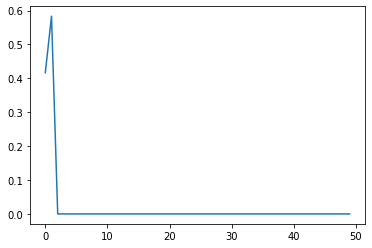

In [71]:
plt.plot(df_plot['epoch'], df_plot['mse'])